In [1]:
!pip install statsmodels==0.14.1
!pip install geopy
!pip install googletrans

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 45.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 11.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 23.1 MB/s eta 0:00:00
     ━━━━━

In [2]:
!pip install statsmodels
!pip install catboost
import statsmodels as sm


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 14.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
import scipy as sp
import requests
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings("ignore")

Мы взяли данные о землетрясеньях из https://earthquaketrack.ru/country/ru/ и https://www.kaggle.com/datasets/usgs/earthquake-database. Также большинство данных мы добавили вручную "искусственно" на основе уже имеющихся

In [9]:
data = pd.read_csv('database5.csv')
data = data.drop('Unnamed: 0',axis=1)

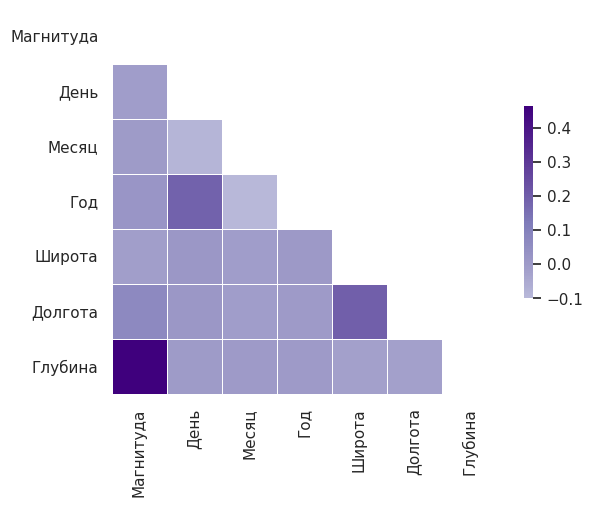

In [10]:
sns.set_style('whitegrid')
sns.set(style="whitegrid")
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(7, 5))
cmap = 'Purples'
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# Обучение

In [ ]:
import statsmodels.api as sm
X =  data.drop(['Магнитуда','Глубина'], axis=1)
X = sm.add_constant(X)
y = data['Магнитуда']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=51)

RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

rfc = RandomForestRegressor(n_estimators=600,random_state=42)
results_rfc = rfc.fit(X_train, y_train)
y_pred_rfc = results_rfc.predict(X_test)

CatBoost

In [ ]:
import catboost as cb
from sklearn.metrics import mean_squared_error

model_cb = cb.CatBoostRegressor(
    iterations=2000,
    depth=8,
    loss_function='RMSE',
    verbose=False
)

categorical_features_indices = np.where(X_train.dtypes == 'category')[0]
results_cb = model_cb.fit(
    X_train, y_train, 
    cat_features=categorical_features_indices
)

y_pred_cb = results_cb.predict(X_test)

 DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor(max_depth=6, random_state=51)
results_tree = model_tree.fit(X_train, y_train)
y_pred_tree = results_tree.predict(X_test)

OLS

In [ ]:
model_OLS = sm.OLS(y_train, X_train)
results_OLS = model_OLS.fit()
y_pred_OLS = results_OLS.predict(X_test)

# Метрики

MAE

In [ ]:
from sklearn.metrics import mean_absolute_error
print("DecisionTree  ", mean_absolute_error(y_test, y_pred_tree))
print("OLS    ", mean_absolute_error(y_test, y_pred_OLS))
print("CatBoost  ", mean_absolute_error(y_test, y_pred_cb))
print("RandomForest   ", mean_absolute_error(y_test, y_pred_rfc))

DecisionTree   0.3834038058217566
OLS     1.6501382093985941
CatBoost   0.25616504997096784
RandomForest    0.20679368090165023


<AxesSubplot: title={'center': 'MAE'}, xlabel='Модели', ylabel='Ошибки'>

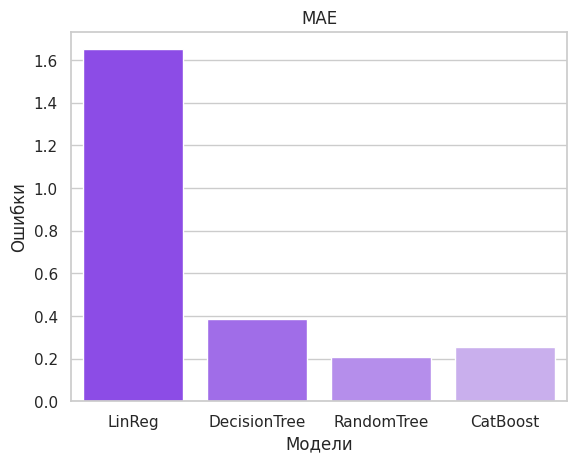

In [ ]:
plt.title('MAE')
plt.xlabel('Модели')
plt.ylabel('Ошибки')
index = ["LinReg","DecisionTree","RandomTree","CatBoost"]
values = [mean_absolute_error(y_test, y_pred_OLS), mean_absolute_error(y_test, y_pred_tree), mean_absolute_error(y_test, y_pred_rfc), mean_absolute_error(y_test, y_pred_cb)]
sns.set_theme(palette='light:#83F_r',style='ticks',rc= {"axes.spines.right": False, "axes.spines.top": False})
sns.barplot(x=index,y=values)

MSE

In [ ]:
from sklearn.metrics import mean_squared_error
print("DecisionTree  ", mean_squared_error(y_test, y_pred_tree))
print("OLS   ", mean_squared_error(y_test, y_pred_OLS))
print("CatBoost   ", mean_squared_error(y_test, y_pred_cb))
print("RandomForest   ", mean_squared_error(y_test,y_pred_rfc))

DecisionTree   1.0037460760212575
OLS    4.831585209364136
CatBoost    0.5348175613392805
RandomForest    0.48142590647989814


<AxesSubplot: title={'center': 'MSE'}, xlabel='Модели', ylabel='Ошибки'>

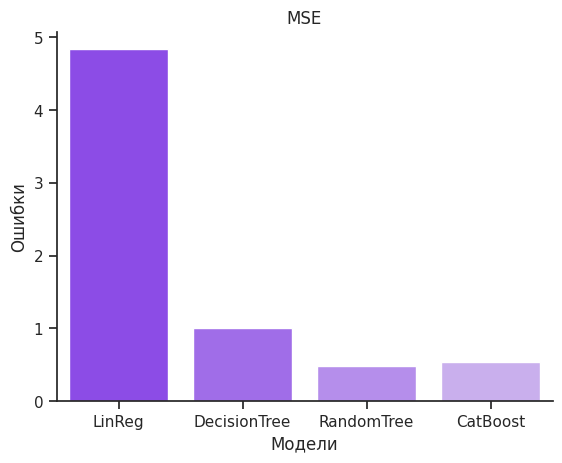

In [ ]:
plt.title('MSE')
plt.xlabel('Модели')
plt.ylabel('Ошибки')
index = ["LinReg","DecisionTree","RandomTree","CatBoost"]
values = [mean_squared_error(y_test, y_pred_OLS), mean_squared_error(y_test, y_pred_tree), mean_squared_error(y_test, y_pred_rfc), mean_squared_error(y_test, y_pred_cb)]
sns.set_theme(palette='light:#83F_r',style='ticks',rc= {"axes.spines.right": False, "axes.spines.top": False})
sns.barplot(x=index,y=values)

RMSE

In [ ]:
from sklearn.metrics import mean_squared_error
print("DecisionTree   ", np.sqrt(mean_squared_error(y_test, y_pred_tree)))
print("OLS   ", np.sqrt(mean_squared_error(y_test, y_pred_OLS)))
print("CatBoost   ", np.sqrt(mean_squared_error(y_test, y_pred_cb)))
print("RandomForest   ", np.sqrt(mean_squared_error(y_test, y_pred_rfc)))

DecisionTree    1.0018712871528246
OLS    2.198086715615227
CatBoost    0.7313122187816093
RandomForest    0.6938486192822597


<AxesSubplot: title={'center': 'RMSE'}, xlabel='Модели', ylabel='Ошибки'>

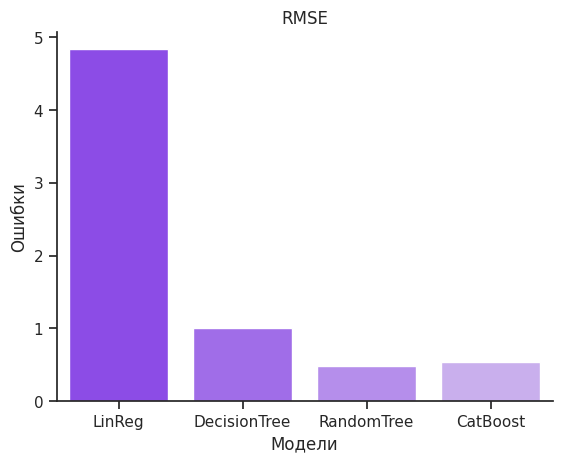

In [ ]:
plt.title('RMSE')
plt.xlabel('Модели')
plt.ylabel('Ошибки')
index = ["LinReg","DecisionTree","RandomTree","CatBoost"]
values = [mean_squared_error(y_test, y_pred_OLS), mean_squared_error(y_test, y_pred_tree), mean_squared_error(y_test, y_pred_rfc), mean_squared_error(y_test, y_pred_cb)]
sns.set_theme(palette='light:#83F_r',style='ticks',rc= {"axes.spines.right": False, "axes.spines.top": False})
sns.barplot(x=index,y=values)

MAPE

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print("DecisionTree   ", mean_absolute_percentage_error(y_test, y_pred_tree))
print("OLS   ",mean_absolute_percentage_error(y_test, y_pred_OLS))
print("CatBoost   ", mean_absolute_percentage_error(y_test, y_pred_cb))
print("RandomForest   ", mean_absolute_percentage_error(y_test, y_pred_rfc))

DecisionTree    778105846513191.0
OLS    3728861174719027.5
CatBoost    534394408211029.4
RandomForest    385993625857530.1


<AxesSubplot: title={'center': 'MAPE'}, xlabel='Модели', ylabel='Ошибки'>

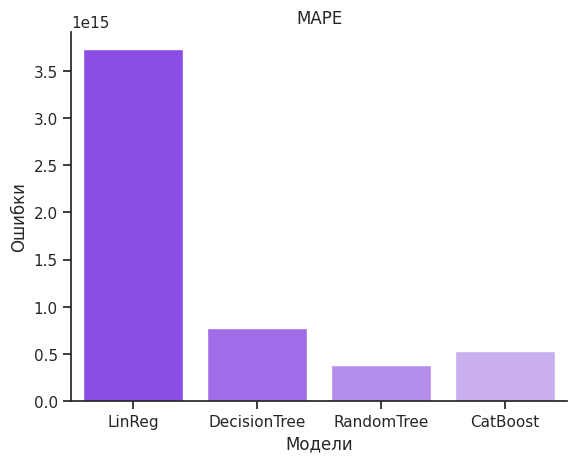

In [ ]:
plt.title('MAPE')
plt.xlabel('Модели')
plt.ylabel('Ошибки')
index = ["LinReg","DecisionTree","RandomTree","CatBoost"]
values = [mean_absolute_percentage_error(y_test, y_pred_OLS), mean_absolute_percentage_error(y_test, y_pred_tree), mean_absolute_percentage_error(y_test, y_pred_rfc), mean_absolute_percentage_error(y_test, y_pred_cb)]
sns.set_theme(palette='light:#83F_r',style='ticks',rc= {"axes.spines.right": False, "axes.spines.top": False})
sns.barplot(x=index,y=values)

# Работа с пользовательским запросом

In [ ]:
import datetime
latitude = -350
longitude = -350
while (latitude<-180 or latitude>180) or (longitude<-180 or longitude>180):
    latitude = float(input('Введите широту').replace(',','.'))
    longitude = float(input('Введите долготу').replace(',','.'))
current_time = datetime.datetime.now()

In [ ]:
s = []
for td in range(32):
    date = current_time + datetime.timedelta(days=td)
    s.append([1,int(date.day),int(date.month),int(date.year),latitude,longitude])
df = pd.DataFrame(s)

In [ ]:
y_pred = results_rfc.predict(df)
ans = y_pred.mean()
if (ans < 3 and y_pred.max() < 4):
    print("Землетрясений не будет")
else:
    print("Будет землятрясение магнитудой:", round(ans, 2))

Землетрясений не будет


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=afa4e8ab-8d82-4be3-84d5-bca85877b62a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>